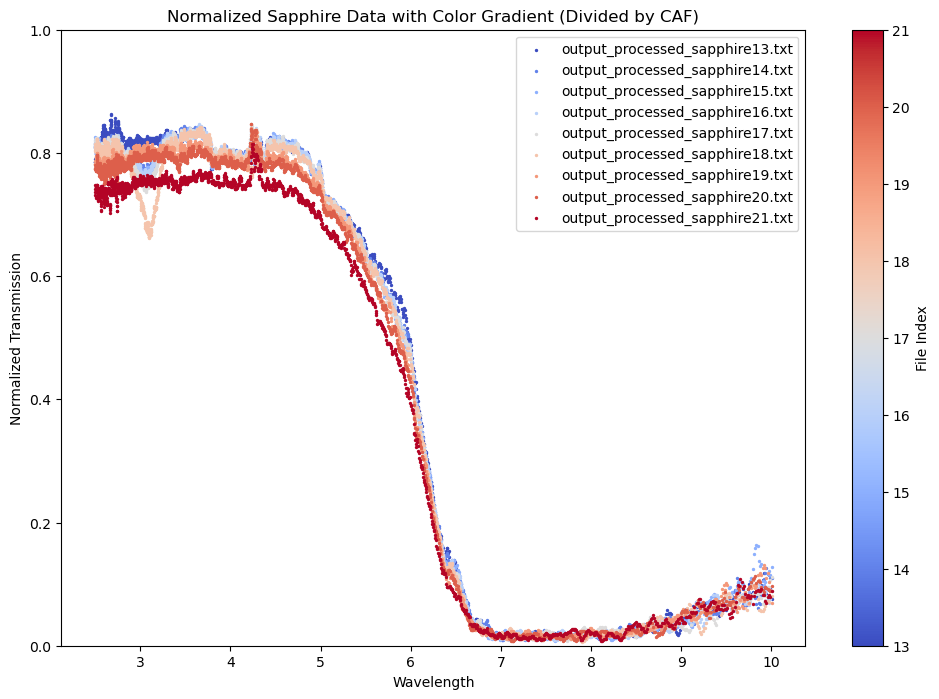

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Function to read and normalize data
def read_and_normalize(file_path, reference_data):
    data = pd.read_csv(file_path, delimiter=' ', skiprows=1, header=None, names=['Wavelength', 'Transmission'])
    
    # Assuming 'reference_data' is the reference dataset
    normalized_transmission = data['Transmission'] / reference_data['Reference'].values

    return data['Wavelength'], normalized_transmission

# Function to plot normalized data with color gradient
def plot_normalized_data(folder_path, reference_data):
    plt.figure(figsize=(12, 8))

    # Get a list of all text files in the directory
    file_list = sorted([file for file in os.listdir(folder_path) if file.endswith(".txt")])

    # Create a color map from blue to red based on the file index
    cmap = plt.get_cmap('coolwarm')
    norm = Normalize(vmin=13, vmax=21)  # Adjust based on the number of sapphire files

    # Iterate through sapphire files in the folder
    for i, file_name in enumerate(file_list):
        file_path = os.path.join(folder_path, file_name)
        wavelength, normalized_transmission = read_and_normalize(file_path, reference_data)

        # Get the color based on the normalized file index
        color = cmap(norm(i + 13))  # Add 13 to match the sapphire file index range

        plt.scatter(wavelength, normalized_transmission, label=file_name, s=2, c=[color])

    # Add a colorbar to the plot
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, label='File Index')

    plt.title('Normalized Sapphire Data with Color Gradient (Divided by CAF)')
    plt.xlabel('Wavelength')
    plt.ylabel('Normalized Transmission')
    plt.ylim(0,1)
    plt.legend()
    plt.show()

# Folder paths for your datasets
folder_path_dataset1 = "/Users/arpi/MRes_data/09.01.24/processed/kNN"
folder_path_dataset2 = "/Users/arpi/MRes_data/30.01.24/processed/kNN"
reference_file_name = "output_processed_CAF9.txt"

# Choose a specific CAF reference file from the second folder
reference_file_path = os.path.join(folder_path_dataset2, reference_file_name)
reference_data = pd.read_csv(reference_file_path, delimiter=' ', skiprows=1, header=None, names=['Wavelength', 'Reference'])

# Plot normalized sapphire data for all files in the first folder using the CAF reference file
plot_normalized_data(folder_path_dataset1, reference_data)
